In [ ]:
from keras.models import load_model
d_model = load_model('model', custom_objects={'binary_crossentropy_plus_jaccard_loss': bce_jaccard_loss,
                                          'iou_score': iou_score})

In [ ]:
def predict_contur(image):
    image_shape = image.shape
    img = cv2.resize(image, target_size)
    
    mask = model.predict(np.expand_dims(img / 255.0, 0))[0] * 255
    
    _,th = cv2.threshold(mask,100,255,cv2.THRESH_BINARY)
    th = cv2.cvtColor(th, cv2.COLOR_RGB2GRAY)
    plates = crop_number_from_mask(image, cv2.resize(th.astype(np.uint8), (image_shape[1], image_shape[0])))
    return plates

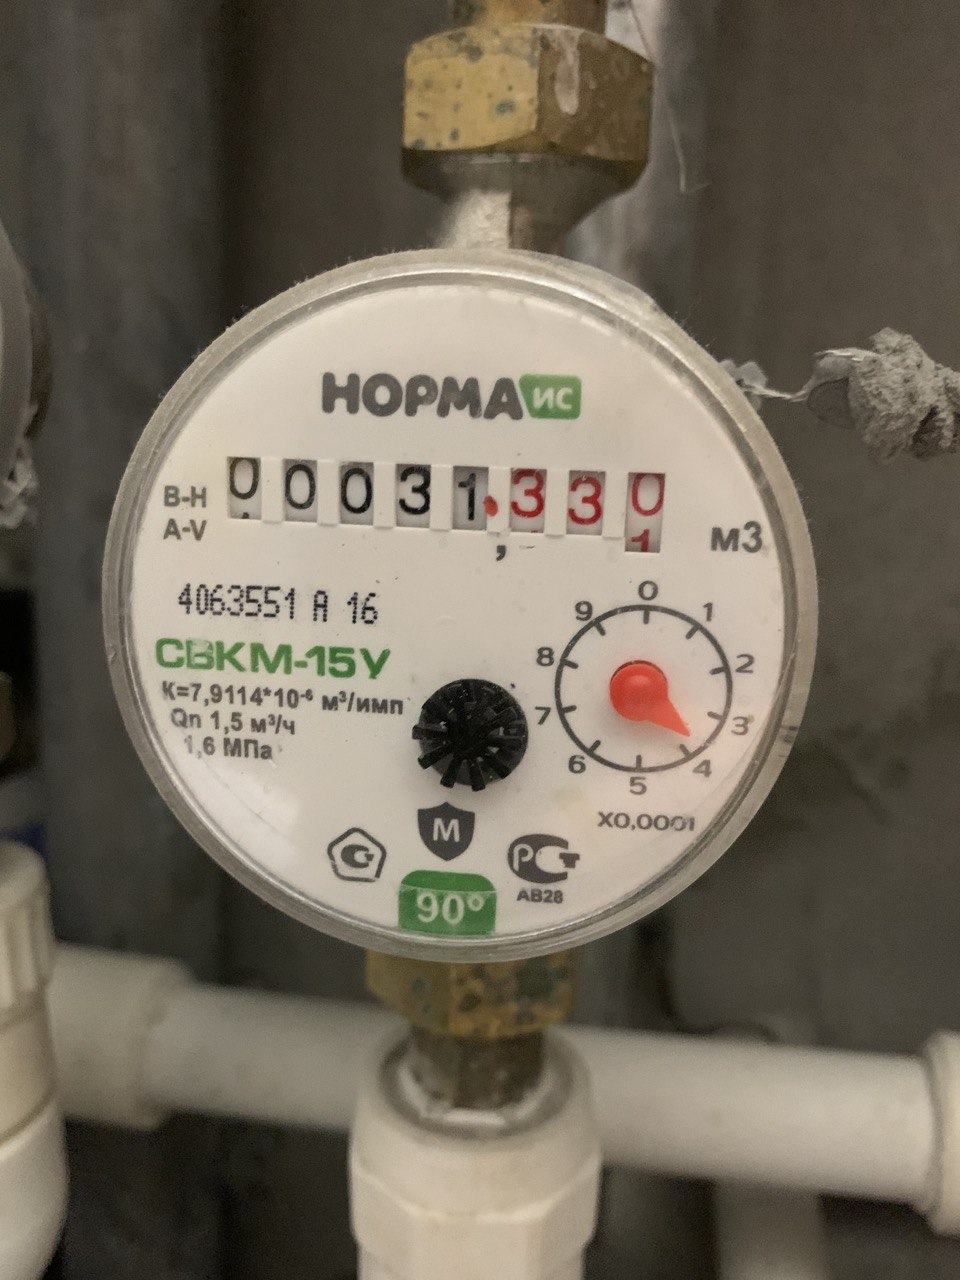

In [ ]:
import cv2

image = cv2.imread('test/data/hot_6.png')
cv2_imshow(image)

[[227, 453], [231, 521]] [[661, 468], [668, 526]]
29769.316


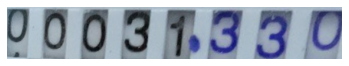

CPU times: user 120 ms, sys: 7.9 ms, total: 128 ms
Wall time: 129 ms


In [ ]:
%%time

plates = predict_contur(image)
for plate in plates:
    print(plate[1])
    plt.axis('off')
    plt.imshow(plate[0])
    plt.show()

img_array = plate[0]

In [ ]:
def recognize(image: np.ndarray):
    plt.imsave('tmp4.png', image)

In [ ]:
!pip install pytesseract
!sudo apt install tesseract-ocr
import pytesseract

In [ ]:
img = cv2.imread('tmp4.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(pytesseract.image_to_string(img,lang='eng'))

000 3 1.3 3 0

